In [23]:
#ABHAY VINOD
#BL.EN.U4CSE21004
#ML_Lab4_Code

import numpy as np
import pandas as pd
data = pd.read_csv("C:\\Users\\user\\Downloads\\student_purchase_behaviour.csv")
data

,0,age,income,student,credit_rating,buys_computer
0,1,<=30,high,no,fair,no
1,2,<=30,high,no,excellent,no
2,3,31...40,high,no,fair,yes
3,4,>40,medium,no,fair,yes
4,5,>40,low,yes,fair,yes
5,6,>40,low,yes,excellent,no
6,7,31...40,low,yes,excellent,yes
7,8,<=30,medium,no,fair,no
8,9,<=30,low,yes,fair,yes
9,10,>40,medium,yes,fair,yes


In [34]:
#A1
import math
import pandas as pd

# Calculate the entropy of a given target attribute
def entropy(target_attr):
    counts = {}
    total = len(target_attr)

    for entry in target_attr:
        if entry not in counts:
            counts[entry] = 0
        counts[entry] += 1

    entropy = 0
    for key in counts:
        probability = counts[key] / total
        entropy -= probability * math.log2(probability)

    return entropy

# Calculate the information gain for a given dataset and attribute
def information_gain(data, attribute):
    total_entropy = entropy(data['buys_computer'])
    attribute_values = data[attribute].unique()

    for value in attribute_values:
        subset = data[data[attribute] == value]['buys_computer']
        subset_entropy = entropy(subset)
        total_entropy -= (len(subset) / len(data)) * subset_entropy

    return total_entropy

# Provided data
data = {
    'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

# Create DataFrame
df = pd.DataFrame(data)

# Define attribute names
attributes = ["age", "income", "student", "credit_rating"]

# Calculate information gain for each attribute
ig_values = {}
for attribute in attributes:
    ig = information_gain(df, attribute)
    ig_values[attribute] = ig

# Find the attribute with the highest information gain
root_node = max(ig_values, key=ig_values.get)

print("Information Gain for each attribute:")
for attribute, ig in ig_values.items():
    print(f"{attribute}: {ig}")

print(f"The root node for the decision tree is: {root_node}")



Information Gain for each attribute:
age: 0.24674981977443933
income: 0.02922256565895487
student: 0.15183550136234159
credit_rating: 0.048127030408269544
The root node for the decision tree is: age


In [41]:
#A2
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Provided data
data = {
    'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

# Create DataFrame
df = pd.DataFrame(data)

# Extract features (X) and target (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Encode each feature column
label_encoders = [LabelEncoder() for _ in range(X.shape[1])]
for i in range(X.shape[1]):
    X[:, i] = label_encoders[i].fit_transform(X[:, i])

# Convert the data back to int (from string)
X = X.astype(int)

# Train a decision tree model
model = DecisionTreeClassifier()
model.fit(X, y)
tree_depth = model.get_depth()

print("Depth of the constructed tree:", tree_depth)



Depth of the constructed tree: 4


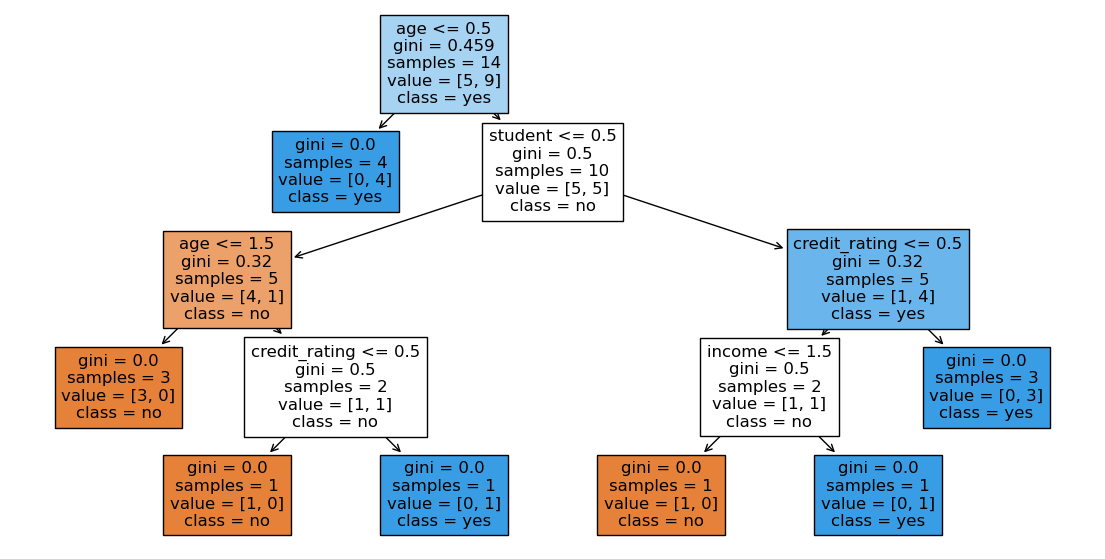

In [42]:
#A3

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

model = DecisionTreeClassifier()

model.fit(X, y)
plt.figure(figsize=(14, 7))
plot_tree(model, filled=True, feature_names=["age", "income", "student", "credit_rating"], class_names=["no", "yes"])
plt.show()

In [43]:
#A4

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Example data (replace this with your actual data)
Tr_X = [[1, 'A'], [2, 'B'], [3, 'A']]
Te_X = [[4, 'B'], [5, 'A'], [6, 'B']]
Tr_y = [0, 1, 0]  # Example target labels for training set
Te_y = [1, 0, 1]  # Example target labels for test set

# Combine the features of the training and test sets
combined_X = Tr_X + Te_X

# Create a list of LabelEncoders for each feature
label_encoders = [LabelEncoder() for _ in range(len(Tr_X[0]))]

# Encode the features using LabelEncoders
for i in range(len(label_encoders)):
    combined_X_column = [row[i] for row in combined_X]
    combined_X_column_encoded = label_encoders[i].fit_transform(combined_X_column)

    for j in range(len(combined_X)):
        combined_X[j][i] = combined_X_column_encoded[j]

# Separate the encoded features back into training and test sets
Tr_X_encoded = combined_X[:len(Tr_X)]
Te_X_encoded = combined_X[len(Tr_X):]

# Train a decision tree model
model = DecisionTreeClassifier()
model.fit(Tr_X_encoded, Tr_y)
training_accuracy = model.score(Tr_X_encoded, Tr_y)
test_accuracy = model.score(Te_X_encoded, Te_y)

print("Training Set Accuracy:", training_accuracy)
print("Test Set Accuracy:", test_accuracy)


Training Set Accuracy: 1.0
Test Set Accuracy: 1.0
